## Import some libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

## Explore the dataset

In [2]:
file_path = "car details v4.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(2)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0


## checkout for null_values/duplicates

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

## Refill the null datapoints

In [6]:
numeric_df = df.select_dtypes('number')
numeric_df.head(2)

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,3995.0,1695.0,1555.0,5.0,42.0


In [7]:
for i in df.columns:
    if i in numeric_df.columns:
        df[i] = df[i].fillna(df[i].mean())

In [8]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
dtype: int64

In [9]:
df['Engine'] = df['Engine'].fillna(method = 'ffill')
df['Max Power'] = df['Max Power'].fillna(method = 'ffill')
df['Max Torque'] = df['Max Torque'].fillna(method = 'ffill')
df['Drivetrain'] = df['Drivetrain'].fillna(method = 'ffill')

In [10]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Data Visiualization

In [12]:
df.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0


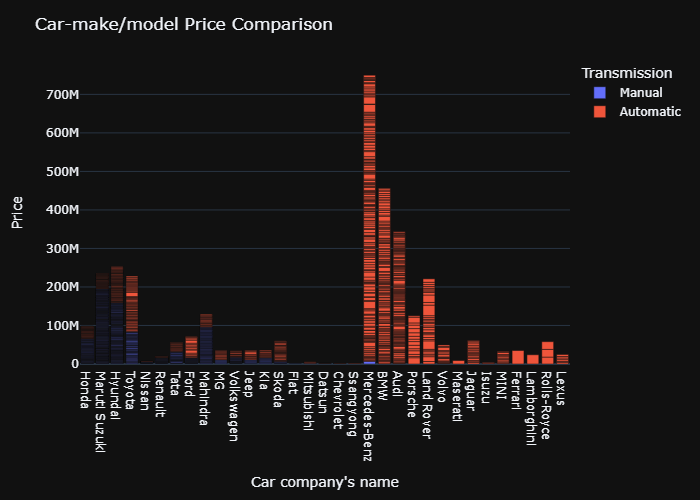

In [13]:
fig = px.bar(df, x='Make', y='Price', color='Transmission', hover_data='Model', template='plotly_dark')
fig.update_layout(xaxis_title = "Car company's name", title_text = 'Car-make/model Price Comparison ')
fig.show(renderer='png')

In [14]:
df2 = df['Transmission'].value_counts().reset_index()
df2

,Transmission,count
0,Manual,1133
1,Automatic,926


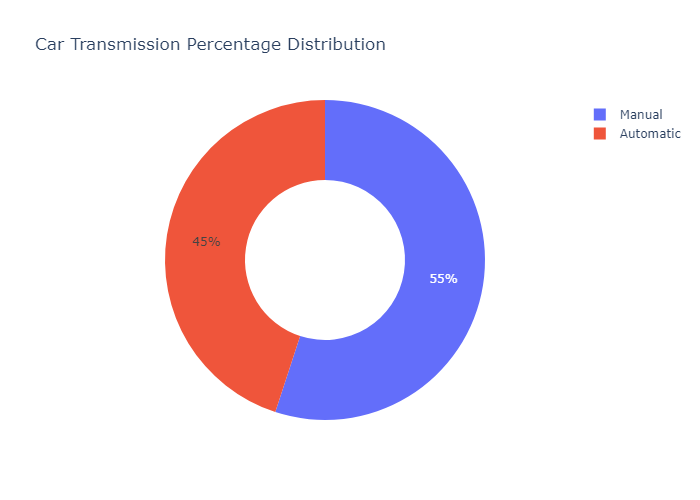

In [15]:
fig = px.pie(df2, names='Transmission', values='count', hole=0.5, title='Car Transmission Percentage Distribution')
fig.show(renderer='png')

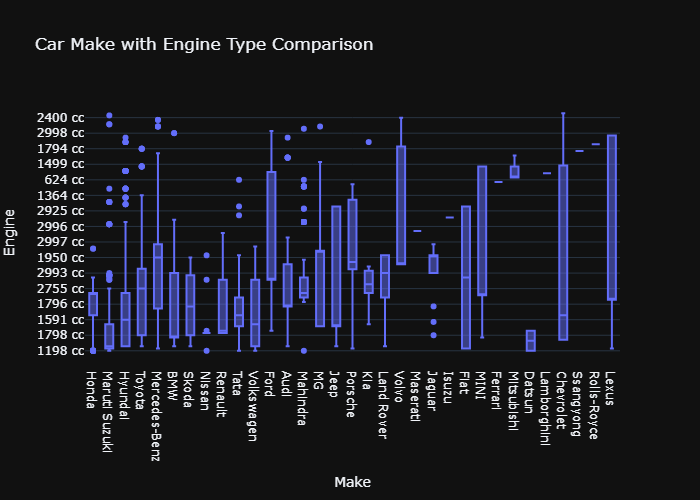

In [16]:
fig = px.box(df, x='Make', y='Engine', title='Car Make with Engine Type Comparison', template='plotly_dark')
fig.show(renderer='png')

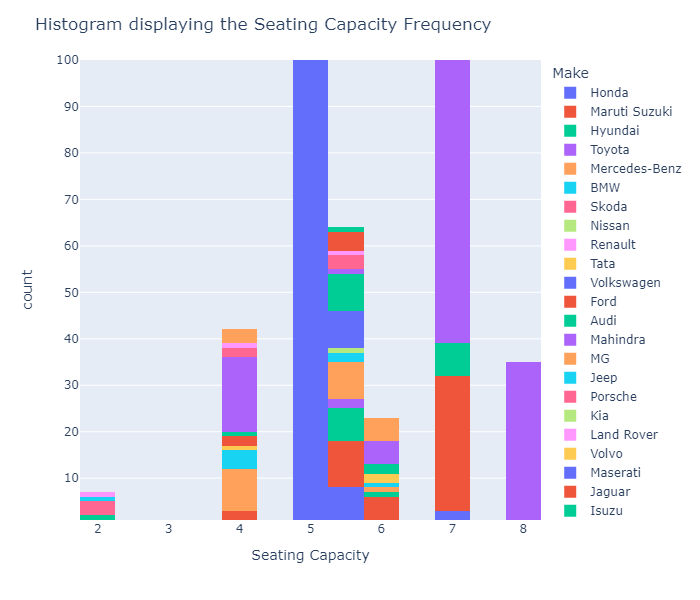

In [17]:
fig = px.histogram(df, x = 'Seating Capacity', height = 600, color = 'Make', nbins = 15)
fig.update_layout(title = 'Histogram displaying the Seating Capacity Frequency', yaxis=dict(range=[1, 100]))
fig.show(renderer='png')

In [18]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [19]:
df2 = df['Fuel Type'].value_counts().reset_index()
df2.tail()

,Fuel Type,count
4,LPG,5
5,Hybrid,3
6,CNG + CNG,1
7,Petrol + CNG,1
8,Petrol + LPG,1


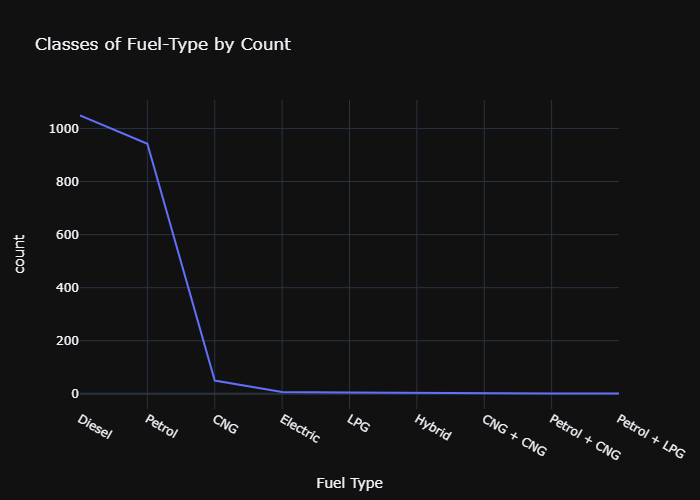

In [20]:
fig = px.line(df2, x='Fuel Type', y='count', title='Classes of Fuel-Type by Count', template='plotly_dark')
fig.show(renderer='png')

In [21]:
df.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0


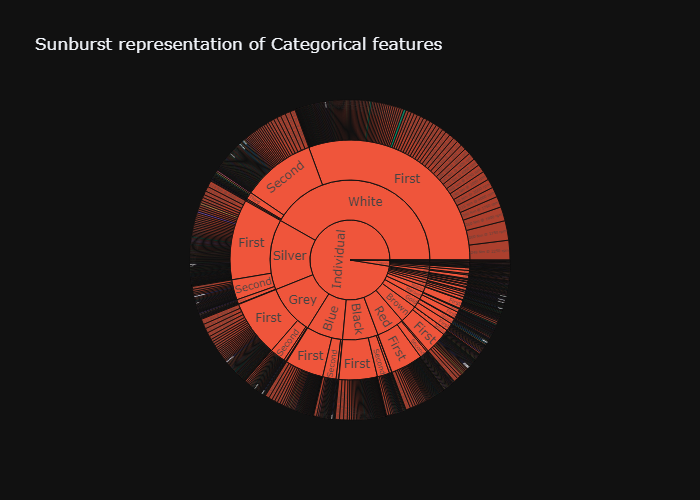

In [22]:
fig = px.sunburst(df, path=['Seller Type', 'Color', 'Owner', 'Max Torque'],  values='Kilometer',  color='Location', template='plotly_dark', title='Sunburst representation of Categorical features')
fig.show(renderer='png')

In [23]:
nums1 = df.select_dtypes('number')
z = nums1.corr()
z.head(3)

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.000000,0.311400,-0.150825,0.552668,0.559870,0.074530,-0.038242,0.562423
Year,0.311400,1.000000,-0.296547,0.093534,0.185129,0.109947,-0.006029,0.060548
Kilometer,-0.150825,-0.296547,1.000000,0.047473,0.017377,0.093136,0.124634,0.055418


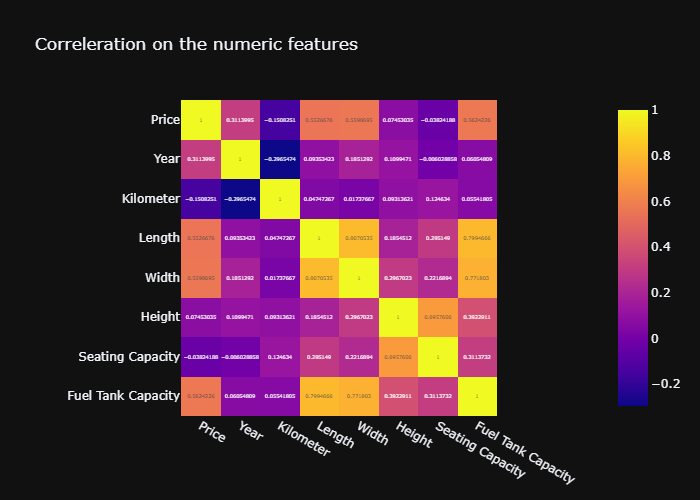

In [24]:
fig = px.imshow(z, text_auto=True, title='Correleration on the numeric features', template='plotly_dark')
fig.show(renderer='png')

#### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"

In [25]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

## Drop redundant features

In [26]:
drop_features = ['Location', 'Color', 'Kilometer', 'Drivetrain', 'Length', 'Width', 'Height', 'Max Torque', 'Max Power', 'Engine', 'Model']

df = df.drop(drop_features, axis=1)
df.head(2)

,Make,Price,Year,Fuel Type,Transmission,Owner,Seller Type,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,Petrol,Manual,First,Corporate,5.0,35.0
1,Maruti Suzuki,450000,2014,Diesel,Manual,Second,Individual,5.0,42.0


## Convert categorical features to numeric

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
cat = df.select_dtypes('object')
cat.head(3)

,Make,Fuel Type,Transmission,Owner,Seller Type
0,Honda,Petrol,Manual,First,Corporate
1,Maruti Suzuki,Diesel,Manual,Second,Individual
2,Hyundai,Petrol,Manual,First,Individual


In [29]:
for i in df.columns:
    if i in cat.columns:
        df[i] = encoder.fit_transform(df[i])

In [30]:
df.head(2)

,Make,Price,Year,Fuel Type,Transmission,Owner,Seller Type,Seating Capacity,Fuel Tank Capacity
0,7,505000,2017,6,1,1,1,5.0,35.0
1,19,450000,2014,2,1,3,2,5.0,42.0


## Convert float variables to integer

In [31]:
df = df.astype('int')

## Checkout for outliers

In [32]:
df.describe()

,Make,Price,Year,Fuel Type,Transmission,Owner,Seller Type,Seating Capacity,Fuel Tank Capacity
count,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,15.039339,1.702992e+06,2016.425449,3.799903,0.550267,1.465274,1.967460,5.296746,52.000000
std,9.170870,2.419881e+06,3.363564,2.059320,0.497588,0.925890,0.190671,0.811029,14.687017
min,0.000000,4.900000e+04,1988.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000
25%,8.000000,4.849990e+05,2014.000000,2.000000,0.000000,1.000000,2.000000,5.000000,42.000000
50%,18.000000,8.250000e+05,2017.000000,2.000000,1.000000,1.000000,2.000000,5.000000,50.000000
75%,21.000000,1.925000e+06,2019.000000,6.000000,1.000000,1.000000,2.000000,5.000000,60.000000
max,32.000000,3.500000e+07,2022.000000,8.000000,1.000000,5.000000,2.000000,8.000000,105.000000


## Reorder my columns

In [33]:
new_order = ['Make', 'Year', 'Transmission', 'Fuel Tank Capacity', 'Owner', 'Seller Type',  'Seating Capacity', 'Fuel Type', 'Price']
df = df.reindex(columns=new_order)
df.head(2)

,Make,Year,Transmission,Fuel Tank Capacity,Owner,Seller Type,Seating Capacity,Fuel Type,Price
0,7,2017,1,35,1,1,5,6,505000
1,19,2014,1,42,3,2,5,2,450000


## Split the features into input(X)/output(y)

In [34]:
X = df.drop('Price', axis=1)
y = df[['Price']]

## Scale my X_values

In [35]:
from sklearn.preprocessing import RobustScaler, StandardScaler
scalar =RobustScaler()

In [36]:
X = scalar.fit_transform(X)
X[:]

array([[-0.84615385,  0.        ,  0.        , ..., -1.        ,
         0.        ,  1.        ],
       [ 0.07692308, -0.6       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.76923077, -1.2       ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.92307692, -0.8       ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.30769231,  0.2       , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.        ,  0.        ]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape

(1647, 8)

## model with FFN

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(256, input_shape=(8,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

## Print the model summary

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0
_________________________________________________________________


## Compile the model for training

In [41]:
loss = keras.losses.MeanAbsoluteError()
optim = keras.optimizers.Adam(learning_rate=0.01)
metric = ['mae']

model.compile(loss=loss, optimizer=optim, metrics=metric)

## Create early stopping callback

In [42]:
# early_stopping = keras.callbacks.EarlyStopping(
#     monitor='val_loss',  
#     patience=3,         
#     mode='min',          
#     restore_best_weights=True 
# )

## Fit the model for training

In [43]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

Epoch 1/1000
42/42 [==============================] - 5s 46ms/step - loss: 1657689.2500 - mae: 1657689.2500 - val_loss: 1675019.2500 - val_mae: 1675019.2500
Epoch 2/1000
42/42 [==============================] - 0s 11ms/step - loss: 1209473.0000 - mae: 1209473.0000 - val_loss: 1123246.6250 - val_mae: 1123246.6250
Epoch 3/1000
42/42 [==============================] - 1s 13ms/step - loss: 861199.8125 - mae: 861199.8125 - val_loss: 918553.0000 - val_mae: 918553.0000
Epoch 4/1000
42/42 [==============================] - 0s 12ms/step - loss: 768409.5625 - mae: 768409.5625 - val_loss: 839872.3750 - val_mae: 839872.3750
Epoch 5/1000
42/42 [==============================] - 0s 11ms/step - loss: 714763.8125 - mae: 714763.8125 - val_loss: 793916.4375 - val_mae: 793916.4375
Epoch 6/1000
42/42 [==============================] - 0s 11ms/step - loss: 682348.8125 - mae: 682348.8125 - val_loss: 763139.1875 - val_mae: 763139.1875
Epoch 7/1000
42/42 [==============================] - 0s 11ms/step - loss:

## Evaluate the model

In [44]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 7ms/step - loss: 593135.8750 - mae: 593135.8750


[593135.875, 593135.875]

## Predict the model

In [45]:
model.predict(X_test)[0]

13/13 [==============================] - 1s 7ms/step


array([5351985.5], dtype=float32)

## Save the model

In [48]:
model.save('Automobile.tf')

INFO:tensorflow:Assets written to: Automobile.tf\assets
